In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Load iris dataset

In [2]:
data = load_iris()
type(data)

sklearn.utils.Bunch

In [3]:
print(data)
print(data.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# Create a mapping between labels and flower names
flower_mapping = dict(zip([0, 1, 2], data.target_names))
print(flower_mapping)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


## Create Pandas DF from bunch

In [5]:
# create pandas DF from bunch
flowerDf = pd.DataFrame.from_records(data.data, columns=["sepal_width", "sepal_length", "petal_width", "petal_length"])


In [6]:
# Add target to current dataframe using existing index
flowerDf['target'] = pd.Series(data.target, index=flowerDf.index)

In [7]:
flowerDf.head()

,sepal_width,sepal_length,petal_width,petal_length,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
flowerDf.shape

(150, 5)

## Create test/train split and explore data

In [9]:
# create train, test set for feature and target
X = flowerDf[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]
y = flowerDf['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X.hist()
plt.show()

<IPython.core.display.Javascript object>

In [11]:
X_train.head()

,sepal_width,sepal_length,petal_width,petal_length
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [12]:
y_train.head()

61     1
92     1
112    2
2      0
141    2
Name: target, dtype: int64

## Examine the data using a scatter matrix

In [13]:
from matplotlib import cm

# scatter matrix plots explore the relationship between a feature against the remaining
# first row is plot of sepal_width vs sepal_length, petal_width and petal_length

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins': 3}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>

Observe the clusters that form, especially when petal length/width are plotted against petal width and length

### Create 3D plot of petal

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['petal_length'], X_train['petal_length'], X_train['sepal_width'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_width')
plt.show()


<IPython.core.display.Javascript object>

## Create KNN classifier and train on train set

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier

In [16]:
knn.score(X_test, y_test)

0.9736842105263158

### Use classifier to predict on unseen data

In [17]:
input = [7.0, 3.0, 5.5, 2.0]
prediction = knn.predict([input])
print(type(prediction))
print(prediction)

<class 'numpy.ndarray'>
[2]


In [18]:
print("prediction for {} = {}".format(input, flower_mapping[prediction[0]]))

prediction for [7.0, 3.0, 5.5, 2.0] = virginica


## Plot decision boundries for the kNN classifier

In [19]:
from matplotlib.colors import ListedColormap
import sklearn.neighbors as neighbors
import numpy

def plot_petal_knn(X, y, weights):
    X_mat = X.as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

#     clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
#     clf.fit(X_mat, y_mat)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    petal_width_min = X_mat[:, 0].min()
    petal_width_max = X_mat[:, 0].max()
    petal_length_min = X_mat[:, 1].min()
    petal_length_max = X_mat[:, 1].max()
    sepal_width_min = X_mat[:, 2].min()
    sepal_width_max = X_mat[:, 2].max()
    sepal_length_min = X_mat[:, 3].min()
    sepal_length_max = X_mat[:, 3].max()
    
    
    x_min, x_max = min(petal_width_min, sepal_width_min) - 1, max(petal_width_max, petal_width_max) + 1
    y_min, y_max = min(petal_length_min, sepal_length_min) - 1, max(petal_length_max, sepal_length_max) + 1
    x1, x2, y1, y2 = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size), numpy.arange(y_min, y_max, mesh_step_size), numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[x1.ravel(), y1.ravel(), x2.ravel(), y2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x1.shape)
    plt.figure()
    plt.pcolormesh(x1, y1, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(x1.min(), x1.max())
    plt.ylim(y1.min(), y1.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel("label 1")
    plt.ylabel("label 2")
    
    plt.show()

In [20]:
#  plot_petal_knn(X_train, y_train, "uniform")

# How sensitive is k-NN to the parameter k - number of neighbours

<IPython.core.display.Javascript object>


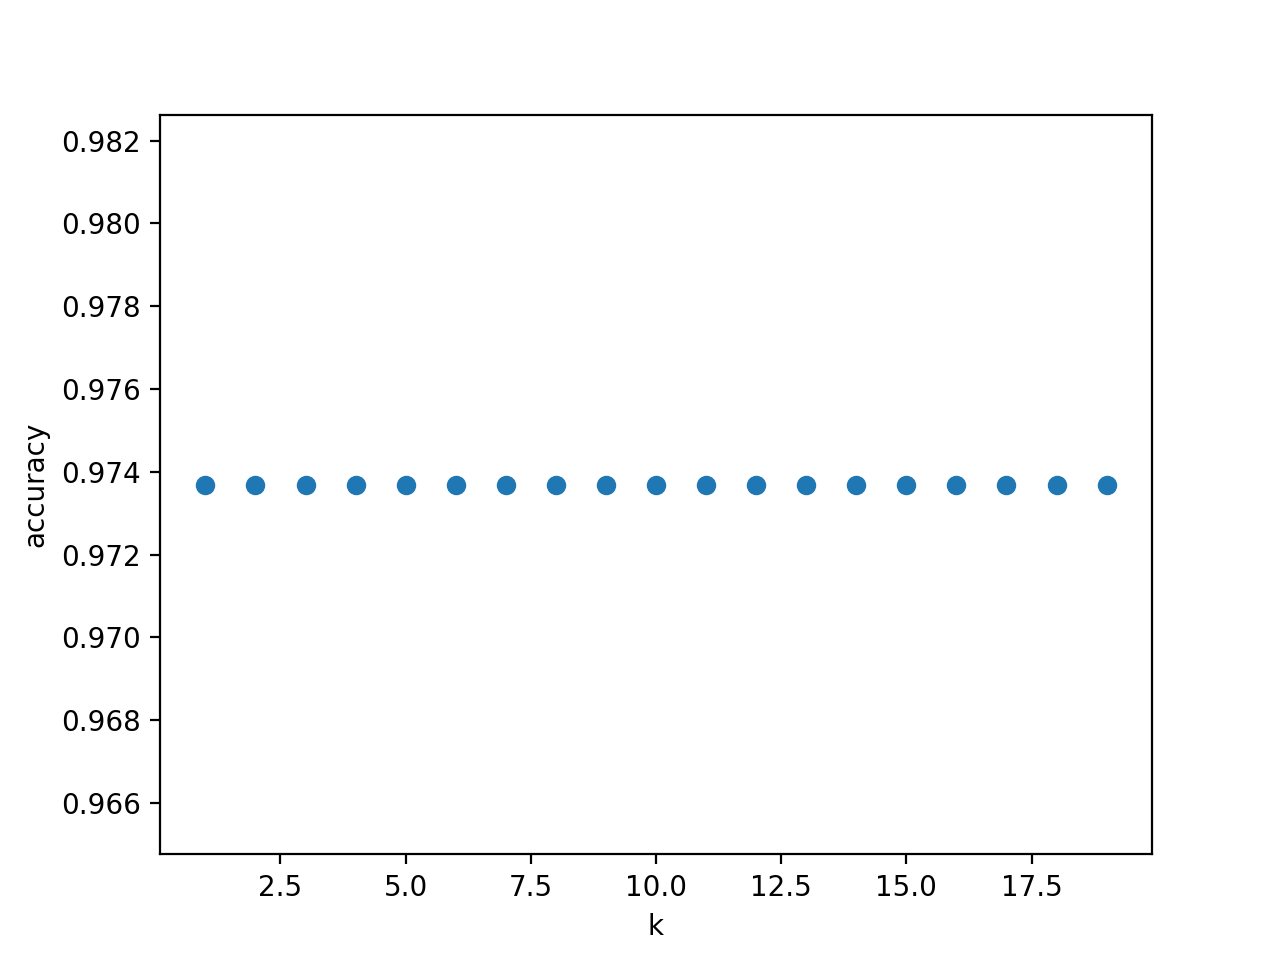

In [23]:
k_range = range(1, 20)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, accuracy)
plt.show()
    

### Finding: Increasing the number of neighbours has no effect on the accuracy

# How sensitive is k-NN classification accuracy to the train/test split portion

<IPython.core.display.Javascript object>


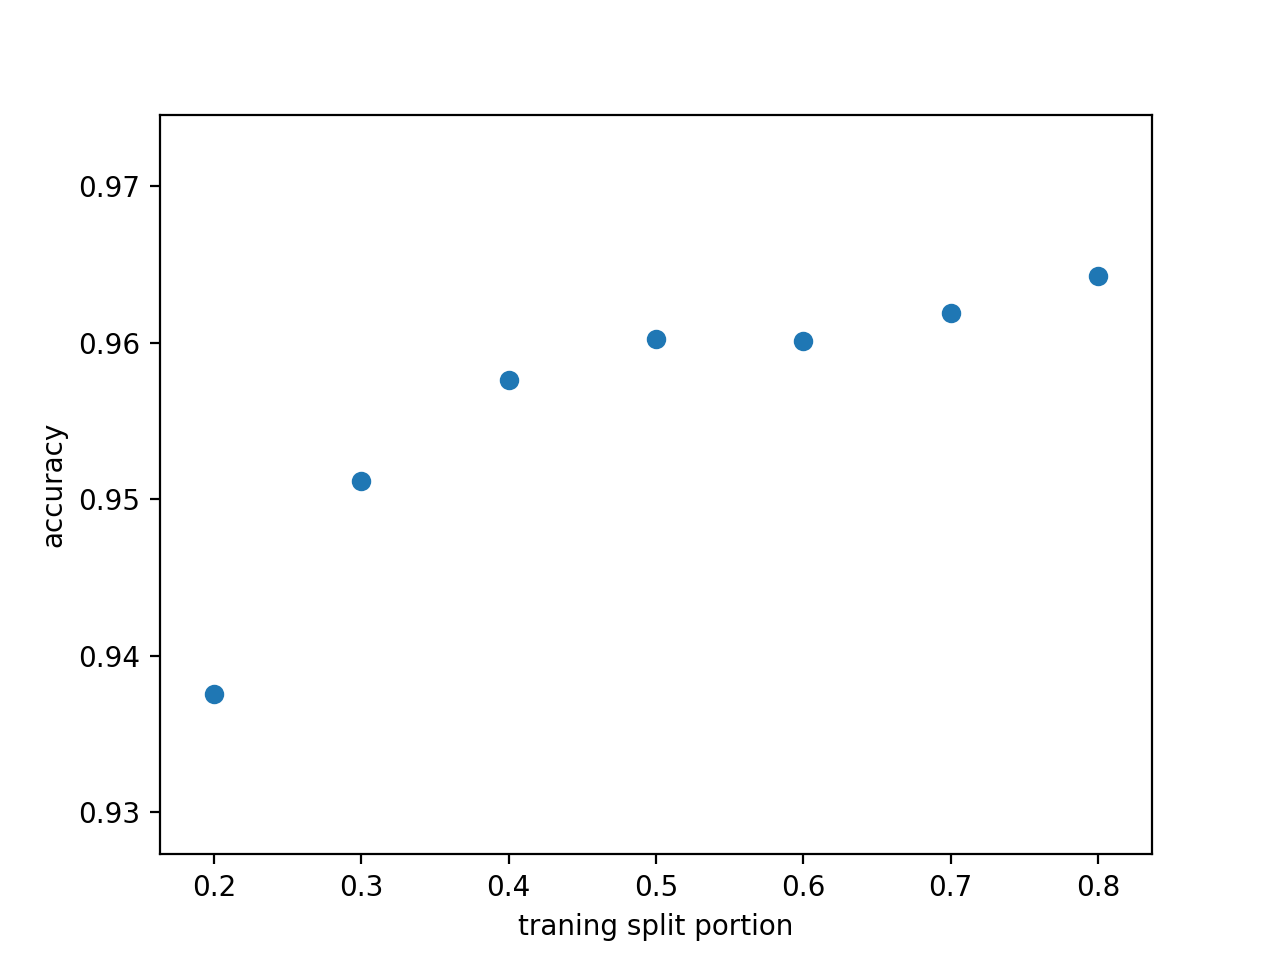

<function matplotlib.pyplot.show(*args, **kw)>

In [28]:
splits = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

accuracy = []
for split in splits:
    # repeat the expriment 1000 times and take the average
    cur_accuracy = []
    for i in range(0, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        cur_accuracy.append(knn.score(X_test, y_test))
    accuracy.append(np.mean(cur_accuracy))
    
plt.figure()
plt.xlabel('traning split portion')
plt.ylabel('accuracy')
plt.scatter(splits, accuracy)
plt.show